# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[10,10,10],
                         path_o = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

In [3]:
gp.plot_data_3D(geo_data)

../../gempy/gempy_front.py:1016: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


closing vtk


In [4]:
geo_data.grid.values

array([[  100.,   100., -1900.],
       [  100.,   100., -1700.],
       [  100.,   100., -1500.],
       ..., 
       [ 1900.,  1900.,  -500.],
       [ 1900.,  1900.,  -300.],
       [ 1900.,  1900.,  -100.]], dtype=float32)

In [5]:
fault = geo_data.interfaces[geo_data.interfaces['formation'] == 'MainFault']

In [6]:
fault[['X', 'Y', 'Z']]

,X,Y,Z
37,1200.000000,1000.000000,-400.000000
34,1000.000000,1000.000000,-1000.000000
35,868.821458,1168.464445,-1356.313698
36,1100.000000,1000.000000,-700.000000
38,800.000000,1000.000000,-1600.000000


In [7]:
from numpy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.linalg import svd

def plane_fit(point_list):
    """
    Fit plane to points in PointSet
    Fit an d-dimensional plane to the points in a point set.
    adjusted from: http://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points

    Args:
        point_list (array_like): array of points XYZ

    Returns:
        Return a point, p, on the plane (the point-cloud centroid),
        and the normal, n.
    """

    import numpy as np

    #     points = np.empty((3, len(point_list)))
    #     for i, point in enumerate(point_list):
    #         points[0, i] = point.x
    #         points[1, i] = point.y
    #         points[2, i] = point.z
    points = point_list

    from numpy.linalg import svd
    points = np.reshape(points, (np.shape(points)[0], -1))  # Collapse trialing dimensions
    assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1],
                                                                                                   points.shape[0])
    ctr = points.mean(axis=1)
    x = points - ctr[:, np.newaxis]
    M = np.dot(x, x.T)  # Could also use np.cov(x) here.
    return M
M = plane_fit(fault[['X', 'Y', 'Z']].values.T)

In [8]:
M

array([[ 107013.38960508,  -21048.42512989,  316389.55558393],
       [ -21048.42512989,   22704.21538314,  -58128.81815758],
       [ 316389.55558393,  -58128.81815758,  936325.20463167]])

In [7]:
print(fault[['X', 'Y', 'Z']].values.T.shape)
points = fault[['X', 'Y', 'Z']].values.T
ctr = points.mean(axis=1)
x = points -  ctr.reshape(-1,1)
M = np.dot(x, x.T)
#points = np.reshape(points, (np.shape(points)[0], -1))
#points.shape

(3, 5)


In [8]:
x

array([[ 200.,    0., -100.,  100., -200.],
       [   0.,    0.,    0.,    0.,    0.],
       [ 600.,    0., -300.,  300., -600.]])

In [9]:
fault_n[:, 0].max(), fault_n[:, 0].min(), fault_n[:, 1].max(), fault_n[:, 1].min()

NameError: name 'fault_n' is not defined

In [10]:
U = svd(M)
U

(array([[-0.31964336,  0.04690856, -0.94637609],
        [ 0.0602339 , -0.99574785, -0.06970006],
        [-0.94562149, -0.07928309,  0.3154587 ]]),
 array([  1.04697534e+06,   1.90674706e+04,   4.41546983e-11]),
 array([[-0.31964336,  0.0602339 , -0.94562149],
        [ 0.04690856, -0.99574785, -0.07928309],
        [ 0.94637609,  0.06970006, -0.3154587 ]]))

<IPython.core.display.Javascript object>


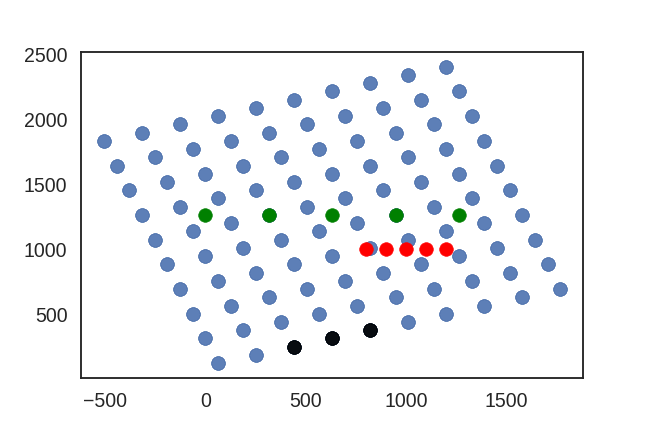

In [10]:
U = svd(M)

p = geo_data.grid.values
new = np.dot(p, U[0])
fault_n = np.dot(fault[['X', 'Y', 'Z']], U[0])
sel = ((new[:, 0]- 689.32121544)**2/600**2 + (new[:, 1] - 285.34009847)**2/100**2) < 1
#sel=s[0][:-68]
%matplotlib notebook
plt.scatter(new[:, 0], new[:, 1], alpha=.2)
plt.scatter(new[sel][:, 0], new[sel][:, 1], alpha=.2, c='black')
plt.scatter(fault_n[:, 0], fault_n[:, 1], c='green')

plt.scatter(fault.iloc[:, 0], fault.iloc[:, 1], c='red')

<IPython.core.display.Javascript object>


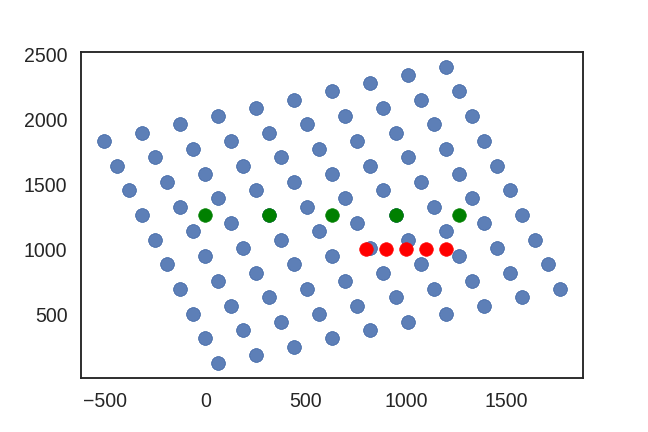

In [21]:
U = svd(M)

p = geo_data.grid.values
new = np.dot(p, U[0])
fault_n = np.dot(fault[['X', 'Y', 'Z']], U[0])
sel = ((new[:, 0]- 689.32121544)**2/600**2 + (new[:, 1] - 285.34009847)**2/100**2) < 1
sel=s[:-68]
%matplotlib notebook
plt.scatter(new[:, 0], new[:, 1], alpha=.2)
plt.scatter(new[sel][:, 0], new[sel][:, 1], alpha=.2, c='black')
plt.scatter(fault_n[:, 0], fault_n[:, 1], c='green')

plt.scatter(fault.iloc[:, 0], fault.iloc[:, 1], c='red')

In [ ]:
M

In [65]:
geo_data.series

,Default series
0,Reservoir
1,SecondaryReservoir
2,Seal
3,Overlying
4,MainFault
5,basement


In [13]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 

In [14]:
geo_data_f = gp.select_series(geo_data, ['fault'])

In [15]:
interp_data = gp.InterpolatorData(geo_data_f)

In [16]:
interp_data.interpolator.tg.select_finite_faults()

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  """Entry point for launching an IPython kernel.


(Elemwise{lt,no_inplace}.0,
 Elemwise{add,no_inplace}.0,
 Elemwise{add,no_inplace}.0,
 dot.0)

In [17]:
interp_data.interpolator.tg.n_formation.get_value()

array([1, 2], dtype=int32)

In [18]:
import theano
th_f = theano.function(interp_data.interpolator.tg.input_parameters_list(),
                        interp_data.interpolator.tg.select_finite_faults(),
                           on_unused_input='ignore',
                           allow_input_downcast=True,
                           profile=False)


/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
s = th_f(*interp_data.get_input_data())


In [20]:
s.sum()

AttributeError: 'list' object has no attribute 'sum'

In [19]:
interp_data.interpolator.tg.fault_relation.get_value()

array([[0]])

In [24]:
geo_data.faults

,isFault
fault,True
Rest,False


<IPython.core.display.Javascript object>


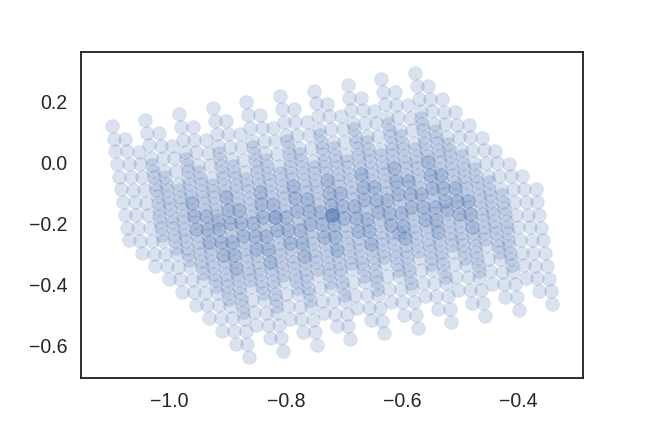

In [38]:
%matplotlib notebook
plt.scatter(s[6][:, 0], s[6][:, 1], alpha=.2)

In [20]:
s[-1][0]

-0.69243884

In [30]:
U[0]

array([[-0.36950184,  0.67761483, -0.63585103],
       [ 0.05160961, -0.66825588, -0.74213915],
       [-0.92779569, -0.30703781,  0.21195034]])

In [7]:
plane = geo_data.create_orientation_from_interfaces([0,1,2,3,4])

In [8]:
n = plane[-3:]
o = plane[:3]
n, o 

(array([-0.55973172, -0.80739664,  0.18657724]),
 array([  925.48835569,  1055.28982715,  -984.27305869]))

In [9]:
d = np.dot(-n, o)
print(d)

1553.70560313


In [10]:
p = geo_data.grid.values

In [11]:
new = p - (np.dot(p,n) +d).reshape(-1,1) * n

In [12]:
(np.dot(p,n) +d).reshape(-1,1) * n

array([[-594.71272299, -857.85570369,  198.23757433],
       [-615.59936322, -887.98407116,  205.19978774],
       [-636.48600346, -918.11243863,  212.16200115],
       ..., 
       [ 636.48600346,  918.11243863, -212.16200115],
       [ 615.59936322,  887.98407116, -205.19978774],
       [ 594.71272299,  857.85570369, -198.23757433]])

<IPython.core.display.Javascript object>


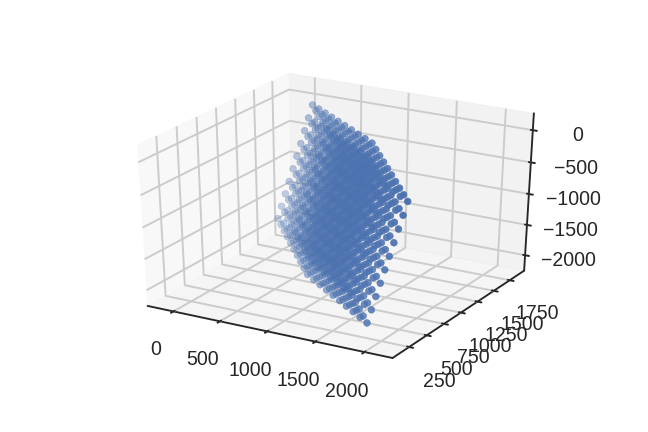

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new[:, 0], new[:, 1], new[:, 2])
#ax.scatter(fault['X'],fault['Y'],fault['Z'], c='red', s=100)

In [14]:
#points = np.random.rand(1000,2)
plt.scatter(points[:, 0], points[:, 1])
sel = (points[:, 0]- 0.5)**2/0.4**2 + (points[:, 1]- 0.5)**2/0.3**2 < 1
plt.scatter(points[sel][:, 0], points[sel][:, 1])

NameError: name 'points' is not defined

In [12]:
 def plane_fit(point_list):
        """
        Fit plane to points in PointSet
        Fit an d-dimensional plane to the points in a point set.
        adjusted from: http://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points

        Args:
            point_list (array_like): array of points XYZ

        Returns:
            Return a point, p, on the plane (the point-cloud centroid),
            and the normal, n.
        """

        import numpy as np

        #     points = np.empty((3, len(point_list)))
        #     for i, point in enumerate(point_list):
        #         points[0, i] = point.x
        #         points[1, i] = point.y
        #         points[2, i] = point.z
        points = point_list

        from numpy.linalg import svd
        points = np.reshape(points, (np.shape(points)[0], -1))  # Collapse trialing dimensions
        assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1],
                                                                                                       points.shape[0])
        ctr = points.mean(axis=1)
        x = points - ctr[:, np.newaxis]
        M = np.dot(x, x.T)  # Could also use np.cov(x) here.
        return M
#         # ctr = Point(x=ctr[0], y=ctr[1], z=ctr[2], type='utm', zone=self.points[0].zone)
#         normal = svd(M)[0][:, -1]
#         # return ctr, svd(M)[0][:, -1]
#         if normal[2] < 0:
#             normal = - normal

#         return ctr, normal

In [16]:

fault = geo_data.interfaces[geo_data.interfaces['formation'] == 'MainFault']
M = plane_fit(fault[['X', 'Y', 'Z']].values.T)

In [17]:
from numpy.linalg import svd


In [18]:
U = svd(M)


In [19]:
n = U[0]#[:,-1]
o = fault[['X', 'Y', 'Z']].values.T.mean(axis=1)

In [20]:
cos_theta = np.dot(n, np.array([0,0,1]))
theta = np.arccos(np.dot(n, np.array([0,0,1])))

In [21]:
# def rot_matrix(n, theta):
#     s = np.array([[
#         np.cos(theta) + n[0] ** 2 * (1 - np.cos(theta)),
#         n[0] * n[1] * (1 - np.cos(theta)) - n[2] * np.sin(theta),
#         n[0] * n[2] * (1 - np.cos(theta)) + n[1] * np.sin(theta)],
#        [n[1] * n[0] * (1 - np.cos(theta)) + n[2] * np.sin(theta),
#         np.cos(theta) + n[1] ** 2 * (1 - np.cos(theta)),
#         n[1] * n[2] * (1 - np.cos(theta)) - n[0] * np.sin(theta)],
#        [n[2] * n[0] * (1 - np.cos(theta)) - n[1] * np.sin(theta),
#         n[2] * n[1] * (1 - np.cos(theta)) + n[0] * np.sin(theta),
#         np.cos(theta) + n[2] ** 2 * (1 - np.cos(theta))
#      ]])
#     return s

    
# R = rot_matrix(n, theta)

In [22]:
R

NameError: name 'R' is not defined

In [23]:


# new = np.dot(p, R)

<IPython.core.display.Javascript object>


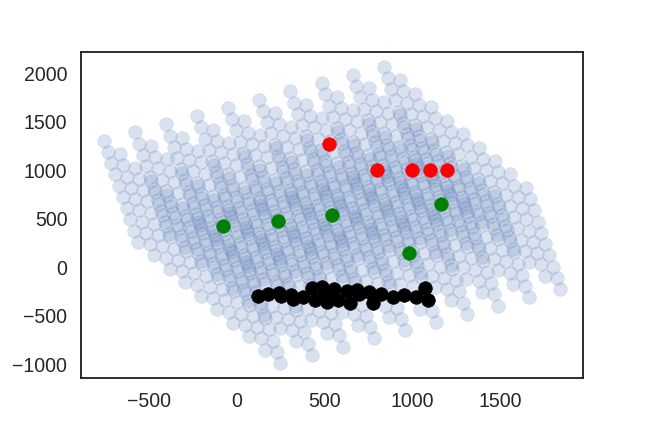

In [44]:
p.shape

(1000, 3)

In [24]:
fault_n.mean(axis=0)

NameError: name 'fault_n' is not defined

In [28]:
fault_n[:, 0].max(), fault_n[:, 0].min(), fault_n[:, 1].max(), fault_n[:, 1].min()

(1164.7269831326669,
 -78.858748178959289,
 655.29379179042814,
 144.7219163740173)

In [29]:
sel = (new[:, 0]- 689.32121544)**2/600**2 + (new[:, 1] +285.34009847)**2/100**2 < 1

In [19]:
fault

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,1000.000000,1000.000000,-1000.000000,MainFault,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,909.535373,1551.499067,-1759.028178,MainFault,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,1100.000000,1000.000000,-700.000000,MainFault,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,1200.000000,1000.000000,-400.000000,MainFault,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,800.000000,1000.000000,-1600.000000,MainFault,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1


In [21]:
fault_n = np.dot(fault[['X', 'Y', 'Z']], U[2])

In [34]:
fault_n

array([[  978.16067944, -1069.00666813,  -948.90801909],
       [ 1859.12267329, -1404.21527432,  -948.90801909],
       [  675.08028193, -1159.24121055,  -948.90801909],
       [  371.99988442, -1249.47575298,  -948.90801909],
       [ 1584.32147445,  -888.53758327,  -948.90801909]])

In [37]:
%matplotlib qt5
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new[:, 0], new[:, 1], new[:, 2])
ax.scatter(fault['X'],fault['Y'],fault['Z'], c='red', s=100)
ax.scatter(fault_n[:, 0],fault_n[:, 1],fault_n[:, 2], c='green', s=100)

In [140]:
from scipy import linalg
m, n = 3, 3
a = np.eye(3) #+ 1.j*np.random.randn(m, n)
a[0,0] = 1
a[0,1] = 2
U, s, Vh = linalg.svd(a)
U.shape,  s.shape, Vh.shape, a


((3, 3), (3,), (3, 3), array([[ 1.,  2.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))

In [141]:
U, s, Vh

(array([[ 0.92387953,  0.        , -0.38268343],
        [ 0.38268343,  0.        ,  0.92387953],
        [ 0.        ,  1.        ,  0.        ]]),
 array([ 2.41421356,  1.        ,  0.41421356]),
 array([[ 0.38268343,  0.92387953,  0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.92387953,  0.38268343,  0.        ]]))

In [144]:
np.dot(U[:,0], U[:,2])

0.0

In [127]:


sigma = np.zeros((m, n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
a1 = np.dot(U, np.dot(sigma, Vh))
np.allclose(a, a1)



True

In [128]:
sigma

array([[  1.42267074e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.26522599e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.97902781e-16]])

In [129]:
np.dot(sigma, Vh)

array([[ -6.63431345e+00,  -8.12331888e+00,  -9.61232431e+00],
       [ -9.92917435e-01,  -1.08122072e-01,   7.76673291e-01],
       [ -2.03267959e-16,   4.06535918e-16,  -2.03267959e-16]])

In [11]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 


In [12]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
35,1600.0,1000.0,-1500.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
36,1750.0,1000.0,-1550.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
37,1000.0,1000.0,-1300.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},6}$",5
38,1900.0,1000.0,-1600.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},7}$",5
39,0.0,0.0,-2000.0,basement,Rest,6,2,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [13]:
gp.get_series(geo_data)

,fault,Rest
0,MainFault,SecondaryReservoir
1,NaN,Seal
2,NaN,Reservoir
3,NaN,Overlying
4,NaN,basement


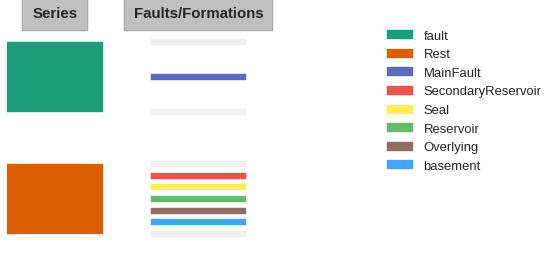

In [14]:
gp.get_sequential_pile(geo_data)

../../gempy/gempy_front.py:789: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


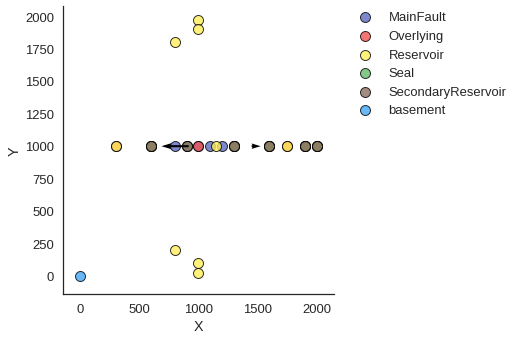

In [32]:
gp.plot_data(geo_data, direction='z')

In [4]:
gp.plot_data_3D(geo_data)

../../gempy/gempy_front.py:854: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


closing vtk


In [23]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True, u_grade=[0,1])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [24]:
sol = gp.compute_model(interp_data)

[[ 6.          6.          6.         ...,  6.          6.          6.        ]
 [ 6.          6.          6.         ...,  6.          6.          6.        ]
 [ 6.          6.          6.         ...,  6.          6.          6.        ]
 ..., 
 [ 2.01486492  2.00524759  2.00182676 ...,  2.          2.          2.        ]
 [ 2.00323343  2.00118351  2.00042772 ...,  2.          2.          2.        ]
 [ 2.00074935  2.00028467  2.00010633 ...,  2.          2.          2.        ]] <class 'numpy.ndarray'>


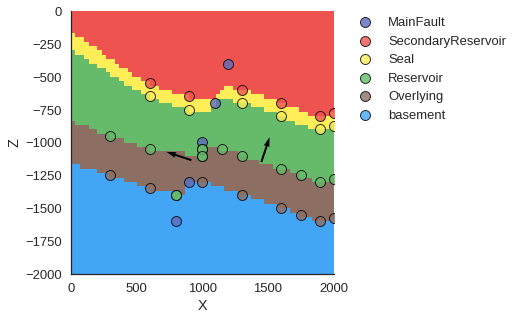

In [25]:
gp.plot_section(geo_data, sol[0][0], 30, plot_data=True)

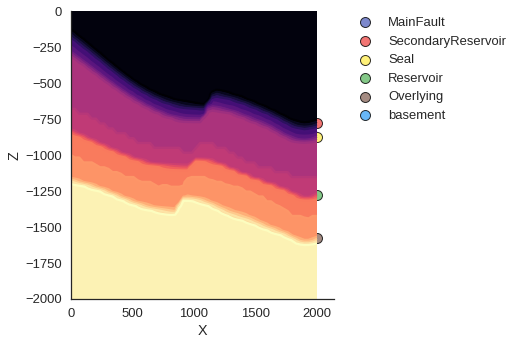

In [27]:
gp.plot_scalar_field(geo_data, sol[0][0], 30)

In [29]:
ver, sim = gp.get_surfaces(interp_data, sol[0][1], sol[1][1])

In [30]:
gp.plot_surfaces_3D(geo_data, ver, sim)